In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
class Point:
    def __init__(self,x,y):
        self.x=x
        self.y=y

In [4]:
initial_points=[(-7,8),(-4,6),(2,6),(6,4),(8,6),(7,-2),
                (4,-6),(8,-7),(0,0),(3,-2),(6,-10),(0,-6),
                (-9,-5),(-8,-2),(-8,0),(-10,3),(-2,2),(-10,4)]

In [5]:
points=[]
for point in initial_points:
    points.append(Point(point[0],point[1]))
n=len(points)
print("The number of points is: ",n)

The number of points is:  18


In [6]:
points[0].x,points[0].y

(-7, 8)

In [7]:
names=''.join(['%c' %x for x in range(65,65+n)])
names

'ABCDEFGHIJKLMNOPQR'

In [8]:
def plotPoints(points,n,names):
    plt.figure(figsize=(5,5))
    for p in range(0,n):
        x=points[p].x
        y=points[p].y
        name=names[p]
        plt.plot(x,y,'bo',markersize=7)
        plt.text(x+0.2,y+0.2,name)
    plt.grid()
    plt.show()

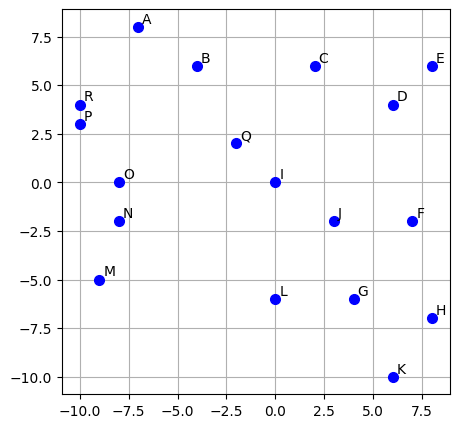

In [9]:
plotPoints(points,n,names)

In [10]:
def findMin(points,n):
    ymin=points[0].y
    mindex=0
    for p in range(1,n):
        y=points[p].y
        if(ymin>y):
            ymin=y
            mindex=p
    return mindex

In [11]:
min=findMin(points,n)
points[0],points[min]=points[min],points[0]

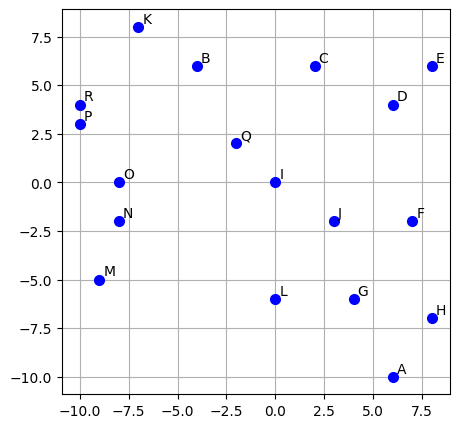

In [12]:
plotPoints(points,n,names)

In [13]:
def findPolarAngles(points,n):
    orgin=points[0]
    theta=[]
    for p in range(0,n):
        angle=math.atan2(points[p].y-orgin.y,points[p].x-orgin.x)
        theta.append(angle)
    theta=np.round(theta,4)
    return theta

In [14]:
theta=findPolarAngles(points,n)
theta

array([0.    , 2.1294, 1.8158, 1.5708, 1.4464, 1.4464, 2.0344, 0.9828,
       2.1112, 1.9296, 2.1963, 2.5536, 2.8198, 2.6224, 2.5213, 2.4593,
       2.1588, 2.4228])

In [15]:
indices=np.argsort(theta)

In [16]:
indices
theta

array([0.    , 2.1294, 1.8158, 1.5708, 1.4464, 1.4464, 2.0344, 0.9828,
       2.1112, 1.9296, 2.1963, 2.5536, 2.8198, 2.6224, 2.5213, 2.4593,
       2.1588, 2.4228])

In [17]:
indices

array([ 0,  7,  4,  5,  3,  2,  9,  6,  8,  1, 16, 10, 17, 15, 14, 11, 13,
       12], dtype=int64)

In [18]:
points_sorted=[]
for p in range(0,n):
    points_sorted.append(points[indices[p]])

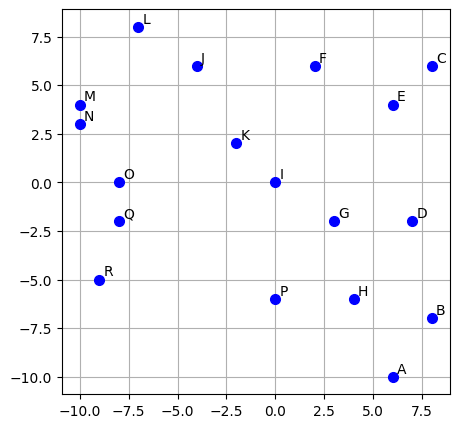

In [19]:
plotPoints(points_sorted,n,names)

In [20]:
points=points_sorted

In [21]:
def orientation(p,q,r):
    d=(((q.y-p.y)*(r.x-p.x))-((q.x-p.x)*(r.y-p.y)))
    if d==0:
        return 0 #collinear
    elif d>0:
        return 1 #right
    else:
        return 2 #left

In [22]:
S=[]
S.append(points[0])
S.append(points[1])
S.append(points[2])

In [23]:
c=3
while(c<n):
    if(orientation(S[-2],S[-1],points[c])!=1):
        S.append(points[c])
        c=c+1
    else:
        S.pop()

In [24]:
for i in range(-len(S),0,1):
    print('Points are ',S[i].x,S[i].y)

Points are  6 -10
Points are  8 -7
Points are  8 6
Points are  -7 8
Points are  -10 4
Points are  -10 3
Points are  -9 -5


In [25]:
def plotConvexHull(points,hull,n,names):
    plt.figure(figsize=(5,5))
    for p in range(0,n):
        x=points[p].x
        y=points[p].y
        name=names[p]
        plt.plot(x,y,'bo',markersize=7)
        plt.text(x+0.2,y+0.2,name)
    for c in range(-len(hull),0,1):
        xvalues=[hull[c].x,hull[c+1].x]
        yvalues=[hull[c].y,hull[c+1].y]
        plt.plot(xvalues,yvalues,'-',color='black')
    plt.grid()
    plt.show()

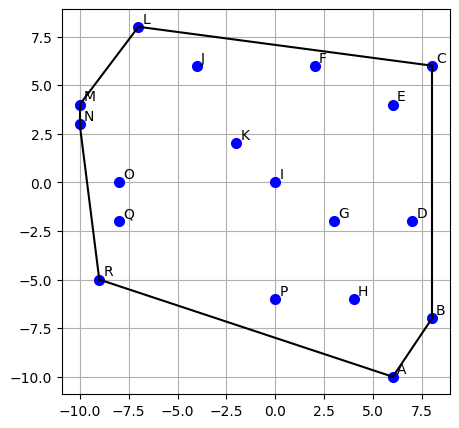

In [26]:
plotConvexHull(points,S,n,names)